<a href="https://colab.research.google.com/github/KashishV999/nlp-transformers-journey/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Natural language Processing
understand human lang, not just single words but **CONTEXT**

#NLP common tasks Ex
- classify
- generate new sentence from input
- multimodality (speech , image)


# LLM - large lang models
- **massive** amount of data train
- perform **general** nlp tasks without task specific training


# Difference in performance if i use task-specific train model vs LLM ?
- In my chatbot I was using **open ai chat completion feature**
which uses gpt [LLM]  -> general nlp tasks -> cause its been trained so billions of datasets -> most likly its gonna give me right answer casue of its heavy training

  - BUTTTTT its gonna be so expensive cause imma pay cost per API call  
  - SPEED - SLOW - call api every time
  - less accurate in giving me domain specific correct answers


- Better way:

We will **finetune a pretrained NLP model** (like BERT, distilbert) on a speciifc task using labeled dataset

- FAST & cheap - use computer resources rather than any api and smaller model with less parameters and run locally

- more accurate as it has domain specific data

BUT WE NEED DATA TO TRAIN








# TRANSFORMERS LIBRARY
Now to work with pretrained models on hugging face for NLP tasks , I'm gonna use transformers library esp **pipeline function** ,
- Fast quick way to work with models as it handles PRE or POST processing
- DO NOT USE WHEN WANT LOW-LEVEL FULL CONTROL

## PIPELINE FOR MULTIMODALITY

### TEXT - Classification



In [ ]:
from transformers import pipeline

In [ ]:
# pipeline by itself cache model according to its task
classifier = pipeline("sentiment-analysis")

In [ ]:
sentences = [
    "I am so excited to got to karan aujla's concert",
    "I was unable to get tickets for the concert"
]

result = classifier(sentences)
result

[{'label': 'POSITIVE', 'score': 0.9997145533561707},
 {'label': 'NEGATIVE', 'score': 0.9997726082801819}]

### TEXT GENERATION

In [ ]:
from transformers import pipeline

In [ ]:
generator= pipeline("text-generation", model="distilgpt2")

In [ ]:
output= generator("This year, I will work to improve", max_new_tokens=200)



In [ ]:
output

[{'generated_text': "This year, I will work to improve our relationship with China, and I hope that this will be a positive development for our bilateral relations. It is a good time to reflect on the progress we have made in the past two years.\n\n\n\nAs a result, I will be working for China, and I hope that this will be a positive development for our bilateral relations. It is a good time to reflect on the progress we have made in the past two years.\nWe are also looking for the Chinese investors to invest in the Chinese government. China is the second largest investor in China, and the second largest investor in China, according to the latest figures released by the People's Bank.\nChina's government is also investing heavily in the Chinese government. After a great deal of growth, there are also potential opportunities to invest in China.\nChina's government is also investing heavily in the Chinese government. After a great deal of growth, there are also potential opportunities to 

### MASK FILLING

In [ ]:
from transformers import pipeline


In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

In [ ]:
unmasker("I want to eat spicy dish called [MASK] today", top_k=3)

[{'score': 0.08729230612516403,
  'token': 7975,
  'token_str': 'chicken',
  'sequence': 'i want to eat spicy dish called chicken today'},
 {'score': 0.0335581935942173,
  'token': 2833,
  'token_str': 'food',
  'sequence': 'i want to eat spicy dish called food today'},
 {'score': 0.01735408790409565,
  'token': 27130,
  'token_str': 'noodles',
  'sequence': 'i want to eat spicy dish called noodles today'}]

### QUESTION ANSWERING

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")


In [ ]:
question_answerer(
    question="what did i ate today?",
    context="I went with my friend to cinema and while coming back"
    "we stopped at some place and the we were feeling hungry so we had butter chicken but"
    "then we drove to a mall to do some shopping where we did not like anything",
)

{'score': 0.8882359862327576,
 'start': 119,
 'end': 133,
 'answer': 'butter chicken'}

### IMAGE

In [ ]:
from transformers import pipeline

image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)


In [ ]:
result = image_classifier(
    "https://images.unsplash.com/photo-1716467891152-1b43a96de578?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8bWFsZSUyMGNhdHxlbnwwfHwwfHx8MA%3D%3D"
)
print(result)

[{'label': 'Egyptian cat', 'score': 0.5328313112258911}, {'label': 'tiger cat', 'score': 0.29956790804862976}, {'label': 'tabby, tabby cat', 'score': 0.08417428284883499}, {'label': 'lynx, catamount', 'score': 0.005267893895506859}, {'label': 'Siamese cat, Siamese', 'score': 0.005000841338187456}]


### AUDIO  (Note: its exactly SAMEEEE , use this whisper for next project)

In [ ]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-small"
)


In [ ]:
result = transcriber(
"https://cdn-media.huggingface.co/speech_samples/sample1.flac")


In [ ]:
print(result)

{'text': " going along slushy country roads and speaking to damp audiences in drafty school rooms day after day for a fortnight. He'll have to put in an appearance at some place of worship on Sunday morning, and he can come to us immediately afterwards."}


# TRANSFORMER PRE-TRAINING AND ARCHITECTURE

- Training -> **Self supervised way**  
  - learn general lang pattern
  - fine tune (less Resouces , time) -> EXAMPLE

## Architecture consists of 2 parts

- Encoder - underatnding
- Decoder - generating

## Key Feature - Layers of Attention mechanism

- pay specific attentin to certain words while prociessing ..
- capture , contextual , relate

`I went to buy tickets for Karan Aujla's concert **it** was expensive`

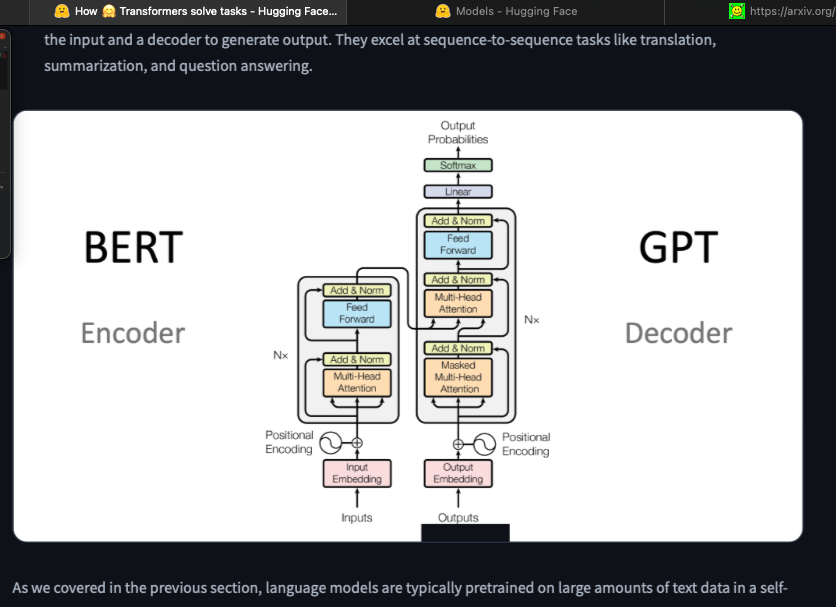

## DETAILS OF ENCODER ARCHITECTURE

- token
- Positional
- **Understand bidirectional context**
  - MLM - MASKED LANGUAGE MODELING
  - NSP
- loss

## DETAILS OF Decoder ARCHITECTURE

- token
- position
- **MASKED SELF ATTENTION (CLM- CAUSAL LANGUAGE MODELING)**
  - [hugging face decoder working](https://huggingface.co/learn/llm-course/chapter1/8#sampling-strategies)

- compare and loss

- Variety imporve - frequency penalty

# CHOICE

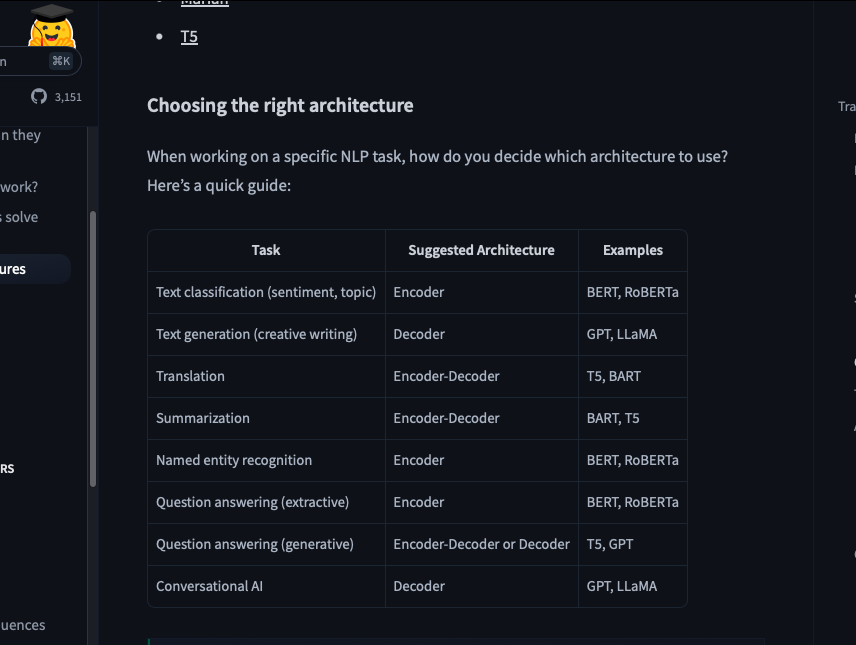

## ALL MODELS ARE VARIANT OF ENCODER-ONLY , DECODER-ONLY OR ENCODER-DECODER

# INSIDE PIPELINE : BUILDING OWN PIPELINE -

## PRE-PROCESSING. text -> numbers -> tensors

In [4]:
from transformers import AutoTokenizer



In [ ]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [6]:
raw_inputs = [
    "I am so excited to got to karan aujla's concert",
    "I was unable to get tickets for the concert"
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)


{'input_ids': tensor([[  101,  1045,  2572,  2061,  7568,  2000,  2288,  2000, 13173,  2078,
          8740,  3501,  2721,  1005,  1055,  4164,   102],
        [  101,  1045,  2001,  4039,  2000,  2131,  9735,  2005,  1996,  4164,
           102,     0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


## PASSS INPUT THROUGH THE MODEL

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

### Return raw Scores

In [9]:
outputs = model(**inputs)
outputs.logits


tensor([[-3.9086,  4.2528],
        [ 4.6608, -3.7275]], grad_fn=<AddmmBackward0>)

## POST PROCESSING -> RAW SCORE TO PROBABILITY

In [10]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)


In [11]:
print(predictions)

tensor([[2.8537e-04, 9.9971e-01],
        [9.9977e-01, 2.2746e-04]], grad_fn=<SoftmaxBackward0>)


In [12]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}